In [1]:
# Import dependencies to use for exploratory data analysis.
import pandas as pd
import numpy as np

In [2]:
# Read in CSV file.
df = pd.read_csv("prepped_data.csv")

In [3]:
# Review the first few rows of data.
df.head()

,id,program,previous_college,ethnic_description,gender,grad_date,hs_ged,hs_ged_grad_date,date_of_birth,hours_attended,hours_scheduled,attendance_percentage,gpa,default_status
0,10302,PTF,Y,Asian,M,2017-12-20,High School,2011-06-27,1992-04-09,140.00,150.0,0.9333,91.0,no
1,10306,PTF,Y,White,M,2017-12-20,High School,2015-06-04,1996-08-17,129.75,150.0,0.8650,95.0,no
2,10312,PTF,Y,White,M,2017-12-20,High School,2008-06-01,1989-08-29,141.75,150.0,0.9450,86.0,no
3,10309,PTF,N,Black or African American,M,2017-12-20,High School,2016-07-01,1997-07-24,138.75,150.0,0.9250,89.0,no
4,10305,PTF,Y,Black or African American,M,2017-12-20,High School,2005-06-01,1987-03-10,144.75,150.0,0.9650,94.0,no


In [4]:
# Review the last few ros of data.
df.tail()

,id,program,previous_college,ethnic_description,gender,grad_date,hs_ged,hs_ged_grad_date,date_of_birth,hours_attended,hours_scheduled,attendance_percentage,gpa,default_status
413,11190,PTF,Y,White,M,2022-04-07,High School,2010-06-01,1991-10-29,145.25,150.0,0.9683,88.0,no
414,11192,PTF,Y,Black or African American,M,2022-04-07,High School,2007-05-29,1987-12-23,150.00,150.0,1.0000,93.0,no
415,11158,PTF,Y,Hispanic/Latino,M,2022-04-07,High School,NaN,1981-03-23,130.00,150.0,0.8667,78.0,no
416,10691,PTF,N,Hispanic/Latino,F,2022-04-07,High School,2012-12-01,1995-01-29,145.25,150.0,0.9683,91.0,no
417,11144,PTF,Y,Hispanic/Latino,M,2022-04-07,High School,2008-06-18,1990-09-09,145.00,150.0,0.9667,85.0,no


In [5]:
# Check for null values.
df.isnull().sum()

id                       0
program                  0
previous_college         0
ethnic_description       0
gender                   0
grad_date                0
hs_ged                   0
hs_ged_grad_date         7
date_of_birth            0
hours_attended           0
hours_scheduled          0
attendance_percentage    0
gpa                      0
default_status           0
dtype: int64

In [6]:
# There are only 7 null values (all one factor).
# Drop null values.
df = df.dropna()

In [7]:
# Check data types.
df.dtypes

id                         int64
program                   object
previous_college          object
ethnic_description        object
gender                    object
grad_date                 object
hs_ged                    object
hs_ged_grad_date          object
date_of_birth             object
hours_attended           float64
hours_scheduled          float64
attendance_percentage    float64
gpa                      float64
default_status            object
dtype: object

In [8]:
# Objects must be changed prior to inputting into machine learning model.

# Import additional dependencies.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df.copy()

In [9]:
df2["gender"] = le.fit_transform(df2["gender"])
list(le.classes_)

['F', 'M']

In [10]:
df2["program"] = le.fit_transform(df2["program"])
list(le.classes_)

['MC-FT 600', 'PTF']

In [11]:
df2["hs_ged"] = le.fit_transform(df2["hs_ged"])
list(le.classes_)

['GED', 'High School']

In [13]:
df2["ethnic_description"] = le.fit_transform(df2["ethnic_description"])
list(le.classes_)

['American Indian or Alaska Native',
 'Asian',
 'Black or African American',
 'Hispanic/Latino',
 'Non-Resident Alien',
 'Race and Ethnicity Unknown',
 'Two or more races',
 'White']

In [14]:
df2["previous_college"] = le.fit_transform(df2["previous_college"])
list(le.classes_)

['N', 'Y']

In [15]:
df2["default_status"] = le.fit_transform(df2["default_status"])
list(le.classes_)

[0, 1]

In [16]:
df2["grad_date"]= pd.to_datetime(df2["grad_date"])
df2["hs_ged_grad_date"]= pd.to_datetime(df2["hs_ged_grad_date"])
df2["date_of_birth"]= pd.to_datetime(df2["date_of_birth"])

In [17]:
# Check new data types.
df2.dtypes

id                                int64
program                           int32
previous_college                  int32
ethnic_description                int32
gender                            int32
grad_date                datetime64[ns]
hs_ged                            int32
hs_ged_grad_date         datetime64[ns]
date_of_birth            datetime64[ns]
hours_attended                  float64
hours_scheduled                 float64
attendance_percentage           float64
gpa                             float64
default_status                    int64
dtype: object

In [18]:
# Calculate the years between hs_ged_grad_date and grad_date.
# Save values in a new column.

df2["years_between_education"] = df2["grad_date"] - df2["hs_ged_grad_date"]

# Convert the difference in terms of years.
df2["years_between_education"] = df2.years_between_education / np.timedelta64(1, "Y")

In [19]:
# Review the first few rows again.
df2.head()

,id,program,previous_college,ethnic_description,gender,grad_date,hs_ged,hs_ged_grad_date,date_of_birth,hours_attended,hours_scheduled,attendance_percentage,gpa,default_status,years_between_education
0,10302,1,1,1,1,2017-12-20,1,2011-06-27,1992-04-09,140.00,150.0,0.9333,91.0,0,6.483364
1,10306,1,1,7,1,2017-12-20,1,2015-06-04,1996-08-17,129.75,150.0,0.8650,95.0,0,2.546254
2,10312,1,1,7,1,2017-12-20,1,2008-06-01,1989-08-29,141.75,150.0,0.9450,86.0,0,9.552558
3,10309,1,0,2,1,2017-12-20,1,2016-07-01,1997-07-24,138.75,150.0,0.9250,89.0,0,1.470256
4,10305,1,1,2,1,2017-12-20,1,2005-06-01,1987-03-10,144.75,150.0,0.9650,94.0,0,12.553304


In [20]:
# Calculate the years between date_of_birth and grad_date.
# Save values in a new column.

df2["age_at_grad"] = df2["grad_date"] - df2["date_of_birth"]

# Convert the difference in terms of years.
df2["age_at_grad"] = df2.age_at_grad / np.timedelta64(1, "Y")

In [21]:
# Review the first few rows again.
df2.head()

,id,program,previous_college,ethnic_description,gender,grad_date,hs_ged,hs_ged_grad_date,date_of_birth,hours_attended,hours_scheduled,attendance_percentage,gpa,default_status,years_between_education,age_at_grad
0,10302,1,1,1,1,2017-12-20,1,2011-06-27,1992-04-09,140.00,150.0,0.9333,91.0,0,6.483364,25.697995
1,10306,1,1,7,1,2017-12-20,1,2015-06-04,1996-08-17,129.75,150.0,0.8650,95.0,0,2.546254,21.341985
2,10312,1,1,7,1,2017-12-20,1,2008-06-01,1989-08-29,141.75,150.0,0.9450,86.0,0,9.552558,28.309958
3,10309,1,0,2,1,2017-12-20,1,2016-07-01,1997-07-24,138.75,150.0,0.9250,89.0,0,1.470256,20.408359
4,10305,1,1,2,1,2017-12-20,1,2005-06-01,1987-03-10,144.75,150.0,0.9650,94.0,0,12.553304,30.782288


In [22]:
# Drop columns that are no longer needed:
# grad_date, hs_ged_grad_date, date_of_birth, hours_attended, hours_scheduled columns.
df3 = df2.drop(["grad_date", "hs_ged_grad_date", "date_of_birth", "hours_attended", "hours_scheduled"], axis = 1)
df3.head()

,id,program,previous_college,ethnic_description,gender,hs_ged,attendance_percentage,gpa,default_status,years_between_education,age_at_grad
0,10302,1,1,1,1,1,0.9333,91.0,0,6.483364,25.697995
1,10306,1,1,7,1,1,0.8650,95.0,0,2.546254,21.341985
2,10312,1,1,7,1,1,0.9450,86.0,0,9.552558,28.309958
3,10309,1,0,2,1,1,0.9250,89.0,0,1.470256,20.408359
4,10305,1,1,2,1,1,0.9650,94.0,0,12.553304,30.782288


In [23]:
# Review descriptive statistics.
df3.describe()

,id,program,previous_college,ethnic_description,gender,hs_ged,attendance_percentage,gpa,default_status,years_between_education,age_at_grad
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,10685.367397,0.472019,0.776156,3.773723,0.661800,0.866180,0.931755,88.699927,0.177616,12.260920,31.324900
std,215.863843,0.499825,0.417327,2.082421,0.473673,0.340874,0.058923,7.729065,0.382655,9.301917,9.414520
min,10302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.786300,36.000000,0.000000,0.303908,17.708783
25%,10519.500000,0.000000,1.000000,2.000000,0.000000,1.000000,0.892900,84.500000,0.000000,5.631875,24.474151
50%,10644.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.946700,90.000000,0.000000,10.086449,29.114903
75%,10829.000000,1.000000,1.000000,6.000000,1.000000,1.000000,0.979150,94.000000,0.000000,15.506136,34.859032
max,11194.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,99.000000,1.000000,47.283654,64.803521


<AxesSubplot:>

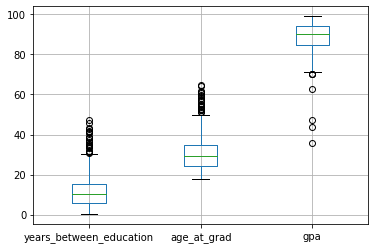

In [24]:
# Create a box plot for years_between_education, age_at_grad, and gpa to review possible outliers.

df3.boxplot(column = ["years_between_education", "age_at_grad", "gpa"])

In [25]:
# years_between_education and age_at_grad have outliers, however, these will not be removed.
# The school has a very large span of ages for students and I do not want this data to be lost.

# gpa has outliers, which implies that these outliers below 70 are errors in the original data due to 70 being
# the minimum GPA for students to graduate.

In [26]:
# Calculate number of GPAs below 70.

gpa_below_70 = df3["gpa"][df3["gpa"] < 70].count()
gpa_below_70

4

In [27]:
# Remove rows with GPAs < 70.

df3.drop(df3.index[df3["gpa"] < 70], inplace=True)

In [28]:
# Re-review descriptive statistics.
df3.describe()

,id,program,previous_college,ethnic_description,gender,hs_ged,attendance_percentage,gpa,default_status,years_between_education,age_at_grad
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,10685.051597,0.469287,0.773956,3.781327,0.663391,0.867322,0.931817,89.106880,0.179361,12.146385,31.207122
std,216.749338,0.499670,0.418783,2.091231,0.473132,0.339644,0.058684,6.506647,0.384127,9.241119,9.334590
min,10302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.786300,70.000000,0.000000,0.303908,17.708783
25%,10518.500000,0.000000,1.000000,2.000000,0.000000,1.000000,0.892900,84.750000,0.000000,5.525096,24.327673
50%,10643.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.946700,90.000000,0.000000,10.078236,29.109427
75%,10829.000000,1.000000,1.000000,6.000000,1.000000,1.000000,0.978300,94.250000,0.000000,15.063964,34.530483
max,11194.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,99.000000,1.000000,47.283654,64.803521


In [29]:
# Check total number of rows and columns.
df3.shape

(407, 11)

In [30]:
# Export cleaned data to a CSV file that will be used for the machine learning models.
df3.to_csv("cleaned_data.csv", index=False)